<a id = "table-of-content"></a>

# Table of Content

- [Introduction](#intro)
- [Data Cleaning](#cleaning)
- [Visualization](#viz)
- [Data Preprocessing](#preprocessing)
- [Feature Engineering](#feature_eng)
- [Model Training and Evaluation](#model_training)

<a id = "intro"></a>
# Introduction

**Scope of this notebook:**<br>
* Explores Fake and Real News Dataset using different Visualization tehniques
* A neural network is trained using custom word embeddings generated from an engineered vocabulary. The network learns from the specific word representations tailored to the engineered vocabulary, allowing it to capture and understand the unique features and patterns within the data.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
import squarify
#nltk.download('stopwords')
#stopwords = nltk.corpus.stopwords.words('english')
import re
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [4]:
fake_news_df = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")
real_news_df = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")

In [5]:
fake_news_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
real_news_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
sample_text = fake_news_df.iloc[29,1]
sample_text

'When Sen. Al Franken (D-MN) announced his plans to resign Thursday, he specifically called out Donald Trump over the Access Hollywood video and Roy Moore, an alleged pedophile who is running for the Senate seat in Alabama with the GOP s blessing. Donald Trump Jr., not known for being a brainiac, decided to mock Franken on Twitter as if he didn t listen to the Democrat s amazing speech. Junior invoked one of the former comedian s  Saturday Night Live  most well-known characters, writing,  because I m good enough, I m smart enough, and God-darnit people like me  and included the hashtag  #Franken. because I m good enough, I m smart enough, and God-darnit people like me. #Franken  Donald Trump Jr. (@DonaldJTrumpJr) December 7, 2017Twitter gave Junior a wake-up call:pic.twitter.com/NmuRm5MgMz  liberalgranny50 (@peppersandeggs) December 7, 2017I am sure daddy @realDonaldTrump can sympathize as he is a fellow sexual predator  pic.twitter.com/Qesftp1u28  Matt Slavin (@tHemAttsLavin) December

<a id = "cleaning"></a>
# Data Cleaning:
1. Since punctuations can indicate some expressions of the sentence so let's not remove them
2. there are some non-Ascii characters present so it can be removed
3. there are many tweeter handles which are mentioned so @ symbol can be removed
4. remove any url present



In [10]:
def remove_unreadable_charaters(text):
    pattern = "[^a-zA-Z0-9\s\.;!?}]"
    text = re.sub(pattern,"",text)
    return text

def remove_url(text):
    pattern = r"https?://\S+|www\.\S+|\S*\.com\S*"
    text = re.sub(pattern,"",text)
    return text

def remove_tweeter_handles(text):
    pattern = r"@\S+"
    text = re.sub(pattern,"",text)
    return text

def remove_stopwords(text):
    text = " ".join([word for word in text.split(" ") if word not in stopwords])
    return text

        

In [11]:
dfs = [fake_news_df,real_news_df]

for df in dfs:
    df["text"] = df["text"].apply(remove_unreadable_charaters).apply(remove_url).apply(remove_tweeter_handles).apply(lambda x: x.lower()).apply(remove_stopwords)
    df["title"] = df["title"].apply(remove_unreadable_charaters).apply(remove_url).apply(remove_tweeter_handles).apply(lambda x: x.lower()).apply(remove_stopwords)

<a id = "viz"></a>
# Visualization

In [12]:
#let's get all the words in a string
fake_news_corpus = ""
for index, each_row in fake_news_df.iterrows():
    fake_news_corpus += each_row["text"]
    

real_news_corpus = ""
for index, each_row in real_news_df.iterrows():
    real_news_corpus += each_row["text"]


In [68]:
from collections import Counter
def get_words_freq(document,top_n_percent):
    word_freq = dict(Counter(document.split(" ")))
    word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True))
    top_n_percent_idx = int(len(word_freq)*top_n_percent)
    top_n_words = list(word_freq.keys())[:top_n_percent_idx]
    print(top_n_words[:10])
    top_words_freq_dict = {key:value for key,value in word_freq.items() if key in top_n_words}
    return top_words_freq_dict

In [117]:
fakenews_words_dict = get_words_freq(fake_news_corpus,0.1)
realnews_words_dict = get_words_freq(real_news_corpus,0.5)


['', 'trump', 'said', 'people', 'president', 'would', 'one', 'like', 'obama', 'clinton']
['', 'said', 'trump', 'u.s.', 'would', 'reuters', 'president', 'said.', 'state', 'new']


In [118]:
fakenews_excls_words_freq = {word:freq for word,freq in fakenews_words_dict.items() if word not in list(realnews_words_dict.keys())}

Text(0.5, 1.0, 'Top 100 words used in Fake news which are not in top 50% words of Real News')

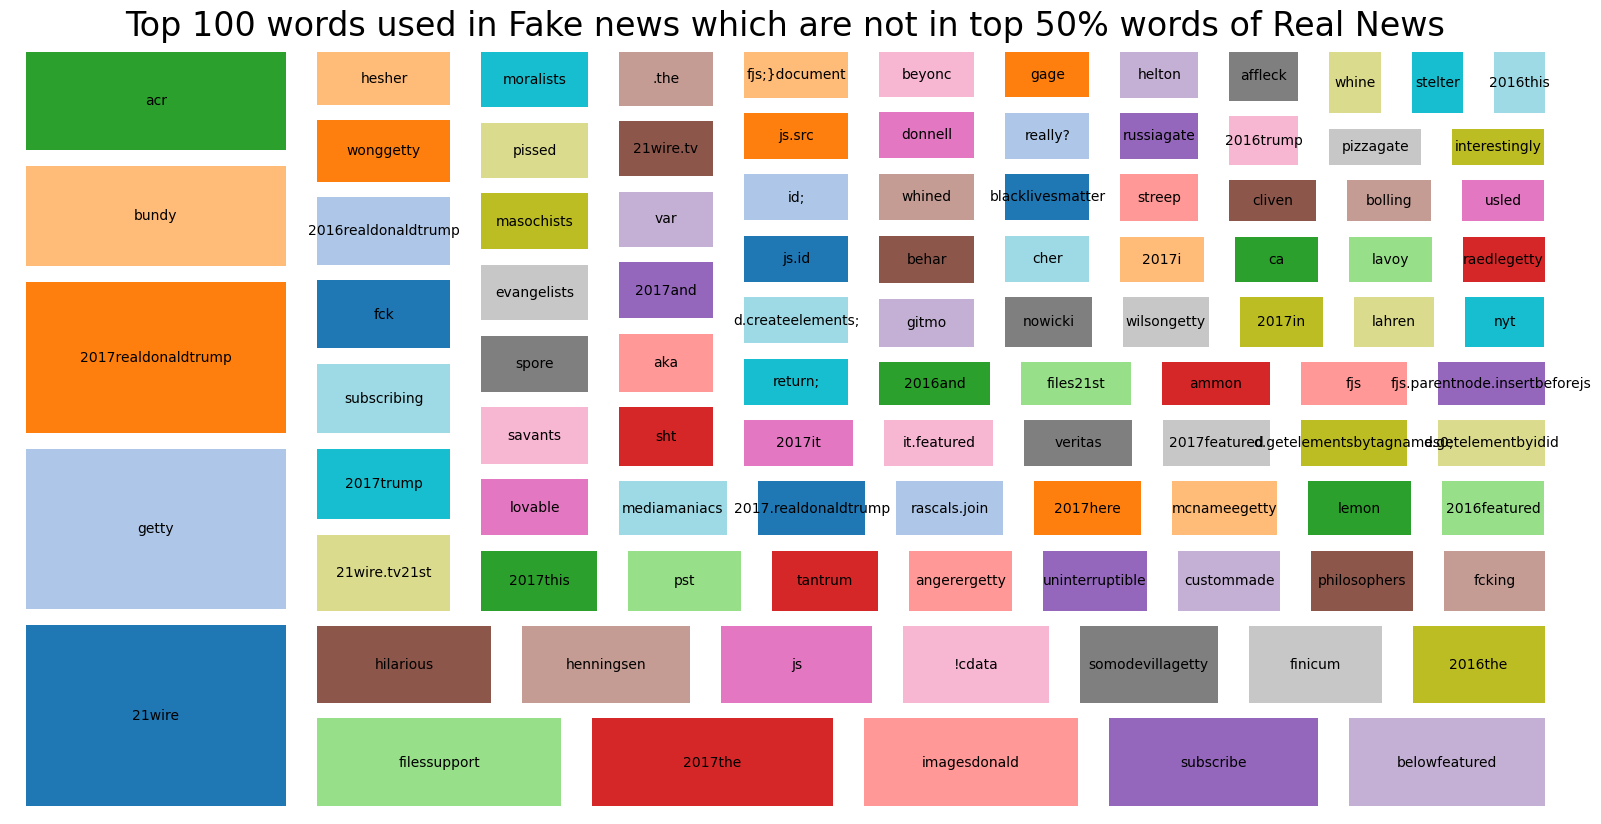

In [120]:
# create a plot figure with figsize
plt.figure(figsize=(20, 10))
# we don't require the axis values so lets remove it
plt.axis("off")
axis = squarify.plot(list(fakenews_excls_words_freq.values())[:100],
                     label=list(fakenews_excls_words_freq.keys())[:100],
                     color=sns.color_palette("tab20", 100),
                     pad=0.5,
                     text_kwargs={'fontsize': 10})
axis.set_title("Top 100 words used in Fake news which are not in top 50% words of Real News", fontsize=24)

Text(0.5, 1.0, 'Top 100 words used in Real news which are not in top 1% words of Fake News')

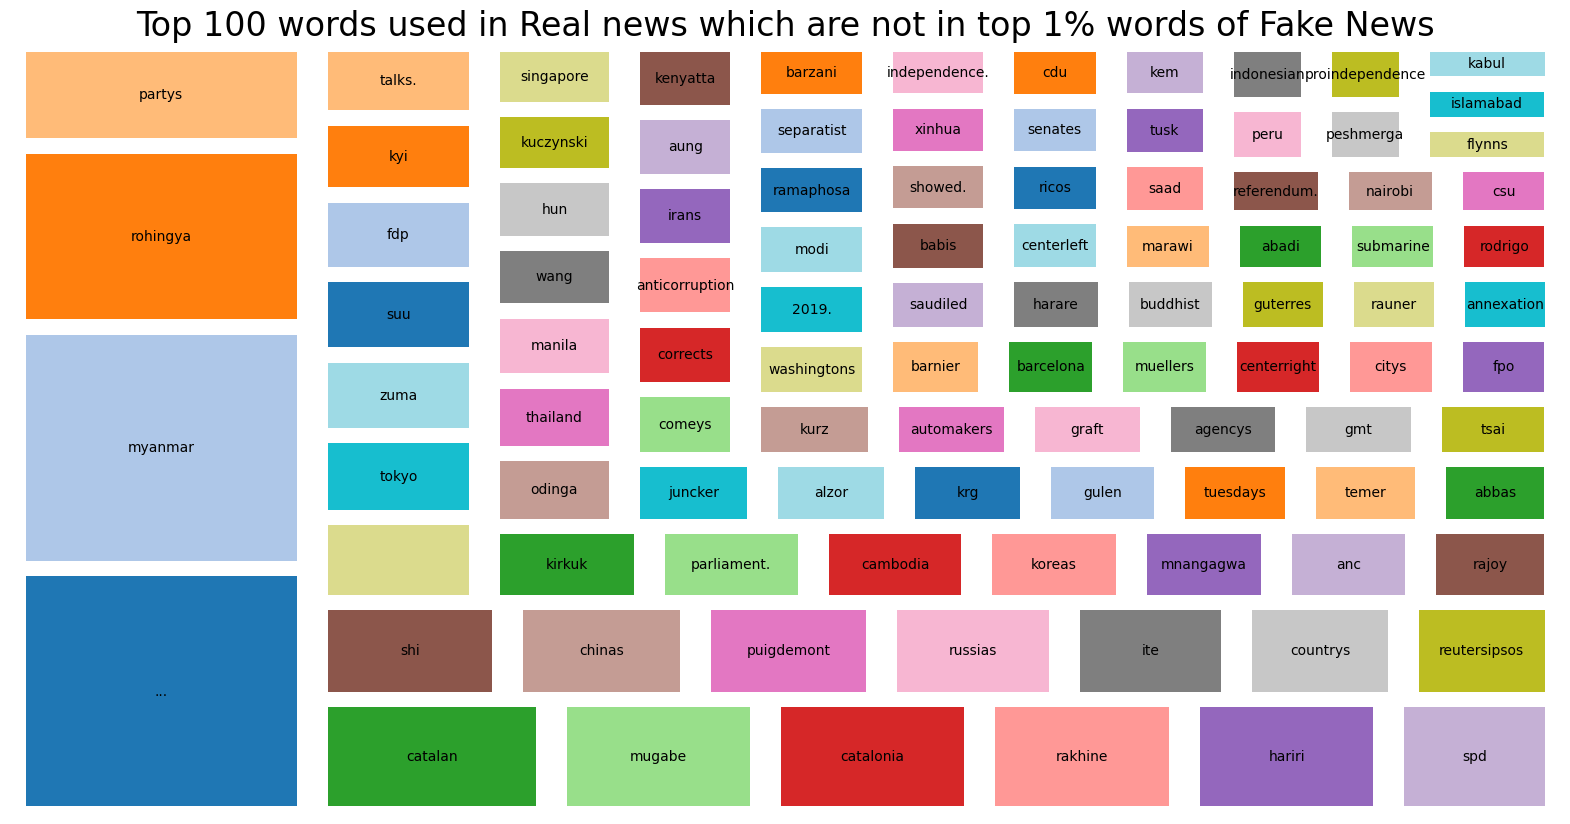

In [121]:
realnews_excls_words_freq = {word:freq for word,freq in realnews_words_dict.items() if word not in list(fakenews_words_dict.keys())}

# create a plot figure with figsize
plt.figure(figsize=(20, 10))
# we don't require the axis values so lets remove it
plt.axis("off")
axis = squarify.plot(list(realnews_excls_words_freq.values())[:100],
                     label=list(realnews_excls_words_freq.keys())[:100],
                     color=sns.color_palette("tab20", 100),
                     pad=1,
                     text_kwargs={'fontsize': 10})
axis.set_title("Top 100 words used in Real news which are not in top 1% words of Fake News", fontsize=24)

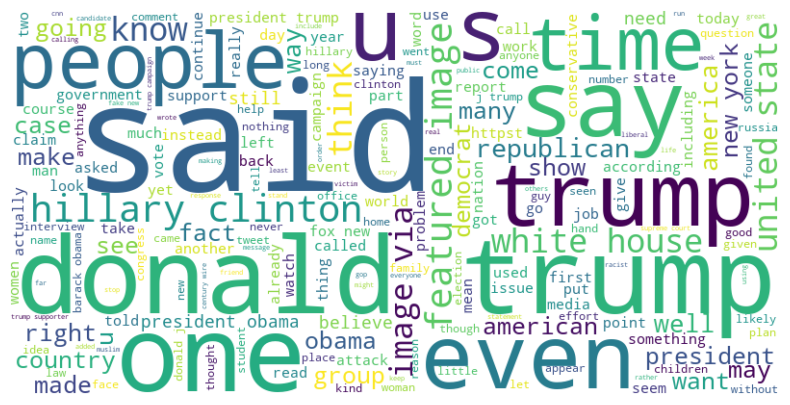

In [83]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(fake_news_corpus)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

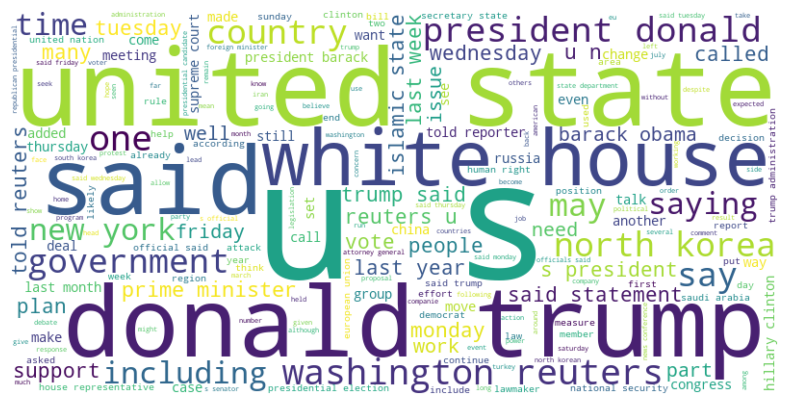

In [84]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(real_news_corpus)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<a id = "preprocessing"></a>
# Data Preprocessing

In [15]:
len(dfs[0]),len(dfs[1])

(23481, 21417)

In [20]:
#creating df with labels
dfs[0]["Label"] = 0 # fake news
dfs[1]["Label"] = 1 #real news
data_df = pd.concat([dfs[0],dfs[1]]).sample(frac=1).reset_index()


In [34]:
data_df_bkp = data_df.copy()

In [36]:
data_df.drop(["index","date","title","subject"],axis=1,inplace=True)


In [39]:
feature_cols = ["text"] 
label_col = ["Label"]
features = data_df[feature_cols]
target = data_df[label_col]

In [46]:
from sklearn.model_selection import train_test_split
train_x,test_x, train_y,test_y = train_test_split(features.values,target.values,test_size=0.2,random_state=42)


In [212]:
p = Counter(list(train_y.flatten()))
q = Counter(list(test_y.flatten()))


In [51]:
train_x,train_y,test_x,test_y = train_x.flatten(),train_y.flatten(),test_x.flatten(),test_y.flatten()

In [65]:
fake_news_corpus_2_train = " ".join([news for news,label in zip(list(train_x),list(train_y)) if label == 0])
real_news_corpus_2_train = " ".join([news for news,label in zip(list(train_x),list(train_y)) if label == 1])                                    

<a id = "feature_eng"> </a>
# Feature Engineering

Now, as we saw above that the top 1% words of fake news which are not present in the top 50% words of real news and vice versa captures most of the information about the authenticity of the news. So, we can train a classifier model on the word embedding of vocabulary with only those words. We can train our own embedding layer to account for a few uncommon words

In [70]:
fakenews_words_dict_2 = get_words_freq(fake_news_corpus_2_train,0.1)
realnews_words_dict_2 = get_words_freq(real_news_corpus_2_train,0.5)
fakenews_excls_words_freq_2 = {word:freq for word,freq in fakenews_words_dict_2.items() if word not in list(realnews_words_dict_2.keys())}

['', 'trump', 'said', 'people', 'president', 'would', 'one', 'like', 'obama', 'clinton']
['', 'said', 'trump', 'u.s.', 'would', 'reuters', 'president', 'said.', 'state', 'new']


In [72]:
fakenews_words_dict_2 = get_words_freq(fake_news_corpus_2_train,0.5)
realnews_words_dict_2 = get_words_freq(real_news_corpus_2_train,0.1)
realnews_excls_words_freq = {word:freq for word,freq in realnews_words_dict_2.items() if word not in list(fakenews_words_dict_2.keys())}

['', 'trump', 'said', 'people', 'president', 'would', 'one', 'like', 'obama', 'clinton']
['', 'said', 'trump', 'u.s.', 'would', 'reuters', 'president', 'said.', 'state', 'new']


In [73]:
realnews_excls_words_freq_2 = realnews_excls_words_freq

In [76]:
list(fakenews_excls_words_freq_2.keys()).extend(list(realnews_excls_words_freq_2.keys()))

In [90]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(fakenews_excls_words_freq_2)

In [92]:
len(tokenizer.word_index)

2118

# Selective Vocabulary
* Instead of Training model on the word embeddings of entire vocabulary of the data, what we can do is focus on the words vocabulary which are exclusive to their respective classes (as calculated above)
* Excluding the "Subject" and "Title" columns from the dataset, as they serve as distinct and informative indicators on their own, aims to determine if we can successfully train a model using only the news content. This approach focuses on exploring whether the textual information itself contains sufficient signals for accurate class prediction.

### Tokenizing words and Training Model with Word Embeddings


In [94]:
train_x = tokenizer.texts_to_sequences(train_x)
test_x  = tokenizer.texts_to_sequences(test_x)

In [181]:
#We are padding all sentences to a length of max length 100.
vocab = len(tokenizer.word_index) + 1
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 70
train_x_ = pad_sequences(train_x, padding='post', maxlen=maxlen)
test_x_ = pad_sequences(test_x, padding='post', maxlen=maxlen)

<a id = "model_training"> </a>
# Model Training and Evaluation

In [186]:
train_y = train_y.reshape(-1,1)
test_y = test_y.reshape(-1,1)

In [184]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense, Activation, MaxPool1D,Conv1D
from tensorflow.keras.optimizers import Adam
emb_dim=200
model= Sequential()
model.add(Embedding(input_dim=vocab, output_dim=emb_dim,
input_length=maxlen))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPool1D(5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPool1D(5))
model.add(Dense(16,activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [185]:
history = model.fit(train_x_,train_y,epochs=5,batch_size=32,verbose=True)

Epoch 1/5
1123/1123 [==============================] - 24s 19ms/step - loss: 0.1012 - accuracy: 0.9635
Epoch 2/5
1123/1123 [==============================] - 21s 19ms/step - loss: 0.0473 - accuracy: 0.9845
Epoch 3/5
1123/1123 [==============================] - 21s 18ms/step - loss: 0.0298 - accuracy: 0.9904
Epoch 4/5
1123/1123 [==============================] - 21s 19ms/step - loss: 0.0225 - accuracy: 0.9923
Epoch 5/5
1123/1123 [==============================] - 21s 19ms/step - loss: 0.0159 - accuracy: 0.9946


In [215]:
model.evaluate(test_x_,test_y)

281/281 [==============================] - 1s 5ms/step - loss: 0.0740 - accuracy: 0.9825


[0.07396623492240906, 0.9825167059898376]

### **Model is able to achieve an accuracy of 98% on the unseen data.** <br>


***Thank you for taking the time to go through this notebook. Your feedback and support are greatly appreciated. Please feel free to leave a comment or upvote this notebook if you found it helpful or enjoyed the content.***